# Importing

In [1]:
from PIL import Image
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2

# Exercise 3

In [ ]:
def u(x):
    return np.sin(5*x)

In [32]:
def sampling(T: float, sampling_range: float):
    
    num_samples_half = round(sampling_range/T)
    x = np.array([T*i for i in range(-num_samples_half, num_samples_half)])
    
    samples = u(x)
    plt.title(f"Sampling rate of {T}")
    plt.plot(x,samples)
    plt.grid()
    plt.show()

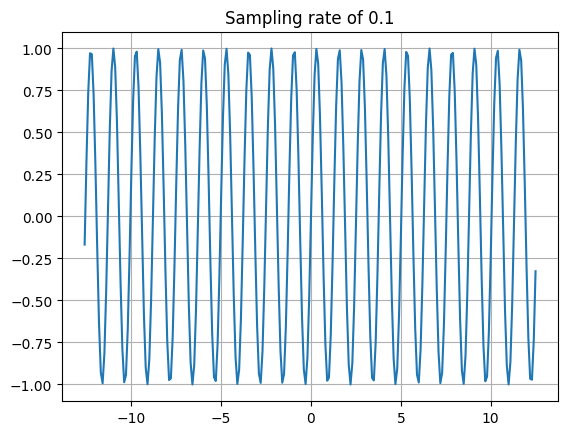

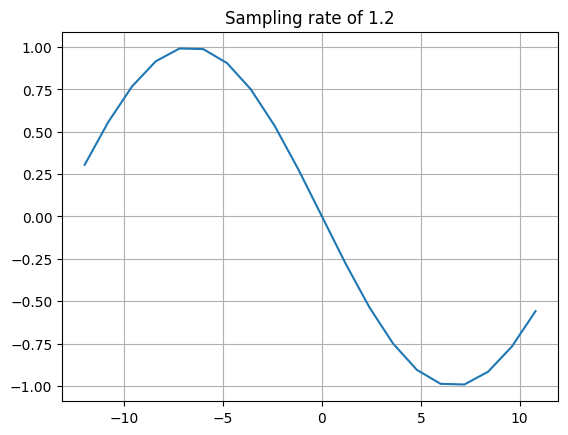

In [33]:
sampling_range=4*np.pi
sampling(0.1, sampling_range)
sampling(1.2, sampling_range)

**Observations**  
For T=0.1, we lose no information regarding the form of the signal. This follows the theory that states that no information is lost when sampling at a higher frequency than the Nyquist frequency. For the function $u(x)=\sin(5x)$, this corresponds to a sampling rate of $\pi/5\approx 0.63 $. Clearly $0.1<0.63$.  
For T=1.2, we get aliasing, and the signal seems like a completely different signal from the real signal. This comes from information loss as $1.2>0.63$.

# Exercise 4

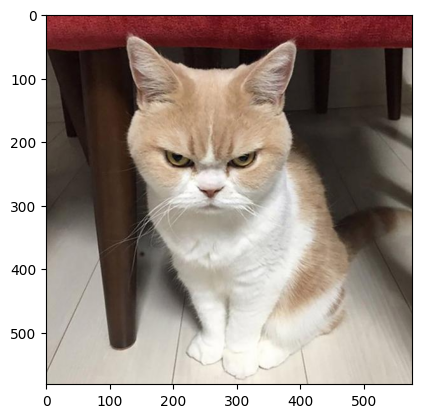

In [2]:
image_source = mpimg.imread("Data/cat.jpg")
plt.imshow(image_source)
plt.show()

In [134]:
image = image_source.copy()
np.shape(image)

(582, 576, 3)

## Exercise 4 part a

In [219]:
def fourier_processing(image_col: np.array, threshold=30, H_type="out"):
    a=np.copy(image_col)
    A=fft(a)
    
    #Applying H
    if H_type=="out":
        A[threshold:-threshold]=0
    else:
        A[:threshold]=0
        A[-threshold:]=0
    B=A
    
    #Inverse transform and preparing for picture
    b=ifft(B)
    
    return np.mean(np.abs(b.imag))
        

In [220]:
thresholds = np.arange(1,300,2)
outer = {"slice_1":[],"slice_2":[], "slice_3":[]}
inner = {"slice_1":[],"slice_2":[], "slice_3":[]}

img_slice_1 = image[:,20,2]
img_slice_2 = image[:,200,2]
img_slice_3 = image[:,500,2]


for threshold in thresholds:
    outer["slice_1"].append(fourier_processing(img_slice_1, threshold=threshold, H_type="out"))
    inner["slice_1"].append(fourier_processing(img_slice_1, threshold=threshold, H_type="in"))
    
    outer["slice_2"].append(fourier_processing(img_slice_2, threshold=threshold, H_type="out"))
    inner["slice_2"].append(fourier_processing(img_slice_2, threshold=threshold, H_type="in"))
    
    outer["slice_3"].append(fourier_processing(img_slice_3, threshold=threshold, H_type="out"))
    inner["slice_3"].append(fourier_processing(img_slice_3, threshold=threshold, H_type="in"))


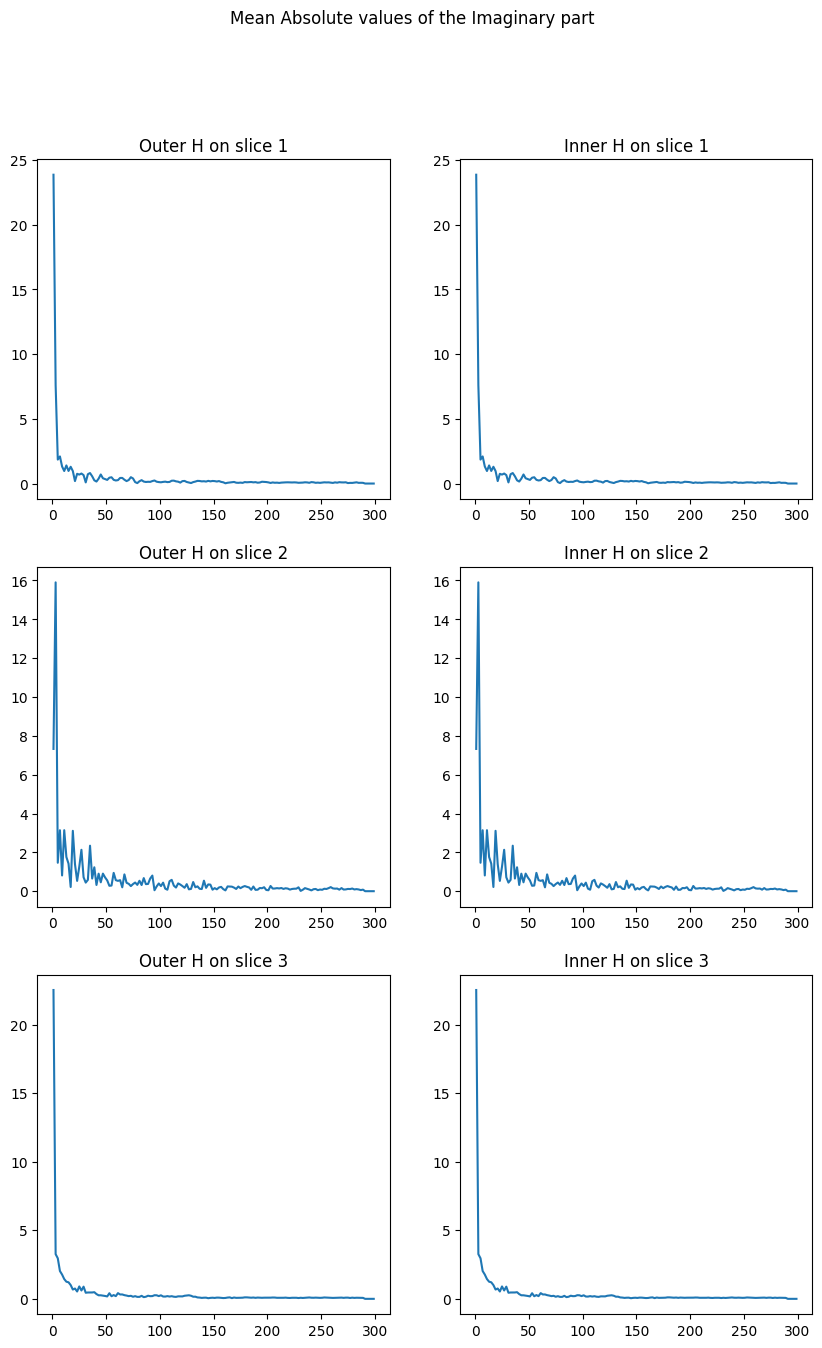

In [222]:
fig,axs = plt.subplots(3,2, figsize=(10,15))

fig.suptitle("Mean Absolute values of the Imaginary part")

axs[0,0].plot(thresholds, outer["slice_1"])
axs[0,0].set_title("Outer H on slice 1")

axs[0,1].plot(thresholds, inner["slice_1"])
axs[0,1].set_title("Inner H on slice 1")

axs[1,0].plot(thresholds, outer["slice_2"])
axs[1,0].set_title("Outer H on slice 2")

axs[1,1].plot(thresholds, inner["slice_2"])
axs[1,1].set_title("Inner H on slice 2")

axs[2,0].plot(thresholds,outer["slice_3"])
axs[2,0].set_title("Outer H on slice 3")

axs[2,1].plot(thresholds,inner["slice_3"])
axs[2,1].set_title("Inner H on slice 3")



plt.show()

## Exercise 4 part b

In [131]:
def blurr(image: np.array, threshold=30, H_type="out"):
    a=np.copy(image)
    A=fft2(a)
    
    #Applying H
    if H_type=="out":
        A[:, threshold:-threshold, :]=0
    else:
        A[:, :threshold, :]=0
        A[:,-threshold:, :]=0
    B=A
    
    #Inverse transform and preparing for picture
    b=ifft2(B)
    b=(b.real).astype(np.int64)
    
    if np.max(b)>255 or np.min(b)<0:
        print(f"The transformed array has the values min:{np.min(b)} and max:{np.max(b)} for H_type:{H_type} and threshold:{threshold}")
        b[b<0]=0
        b[b>255]=255
        
    return b
        

In [132]:
b1_out = blurr(image, threshold=1)
b2_out = blurr(image, threshold=5)
b3_out = blurr(image, threshold=30)
b4_out = blurr(image, threshold=300)

b1_in = blurr(image, H_type="in", threshold=1)
b2_in = blurr(image, H_type="in", threshold=5)
b3_in = blurr(image, H_type="in", threshold=30)
b4_in = blurr(image, H_type="in", threshold=300)

The transformed array has the values min:-12 and max:258 for H_type:out and threshold:5
The transformed array has the values min:-10 and max:270 for H_type:out and threshold:30
The transformed array has the values min:-156 and max:186 for H_type:in and threshold:1
The transformed array has the values min:-160 and max:146 for H_type:in and threshold:5
The transformed array has the values min:-87 and max:130 for H_type:in and threshold:30


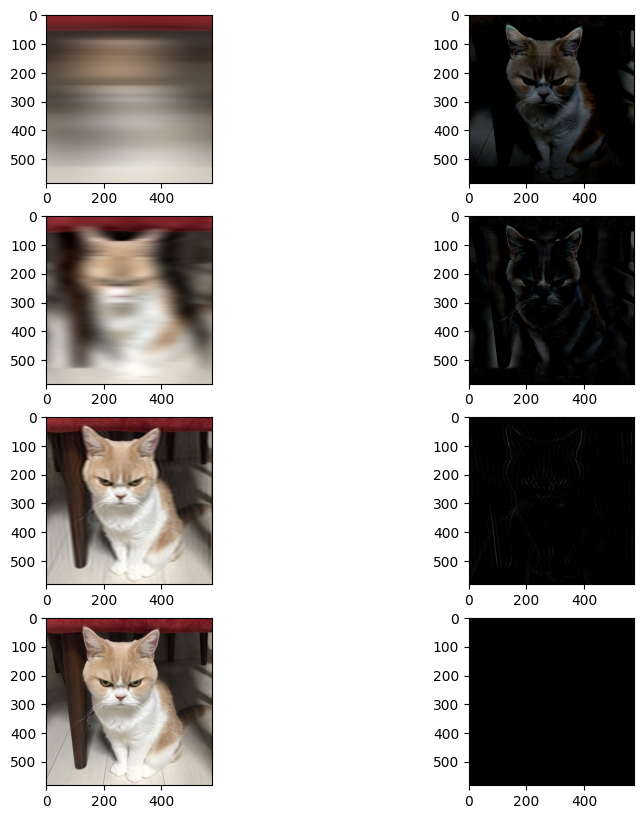

In [133]:
fig,axs = plt.subplots(4,2, figsize=(10,10))

axs[0,0].imshow(b1_out)
axs[1,0].imshow(b2_out)
axs[2,0].imshow(b3_out)
axs[3,0].imshow(b4_out)

axs[0,1].imshow(b1_in)
axs[1,1].imshow(b2_in)
axs[2,1].imshow(b3_in)
axs[3,1].imshow(b4_in)

plt.show()

# Trashcan

In [201]:
def fourier_processing(image_col: np.array, threshold=30, H_type="out"):
    a=np.copy(image_col)
    A=fft(a)
    
    #Applying H
    if H_type=="out":
        A[threshold:-threshold]=0
    else:
        A[:threshold]=0
        A[-threshold:]=0
    B=A
    
    #Inverse transform and preparing for picture
    b=ifft(B)
    
    mean_absolute_diff = np.mean(np.abs(b.real-a))
    mean_absolute_imag = np.mean(np.abs(b.imag))
    mean_absolute_real = np.mean(np.abs(b.real))
        
    return mean_absolute_diff, mean_absolute_imag, mean_absolute_real
        

In [204]:
thresholds = np.arange(1,300,2)
out_stats = []
in_stats = []

img_slice = image[:,20,2]


for threshold in thresholds:
    out_stats.append(fourier_processing(img_slice, threshold=threshold, H_type="out"))
    in_stats.append(fourier_processing(img_slice, threshold=threshold, H_type="in"))
    
mean_abs_diff_out = np.array(out_stats)[:,0]
mean_abs_imag_out = np.array(out_stats)[:,1]
mean_abs_real_out = np.array(out_stats)[:,2]
mean_abs_diff_in = np.array(in_stats)[:,0]
mean_abs_imag_in = np.array(in_stats)[:,1]
mean_abs_real_in = np.array(in_stats)[:,2]

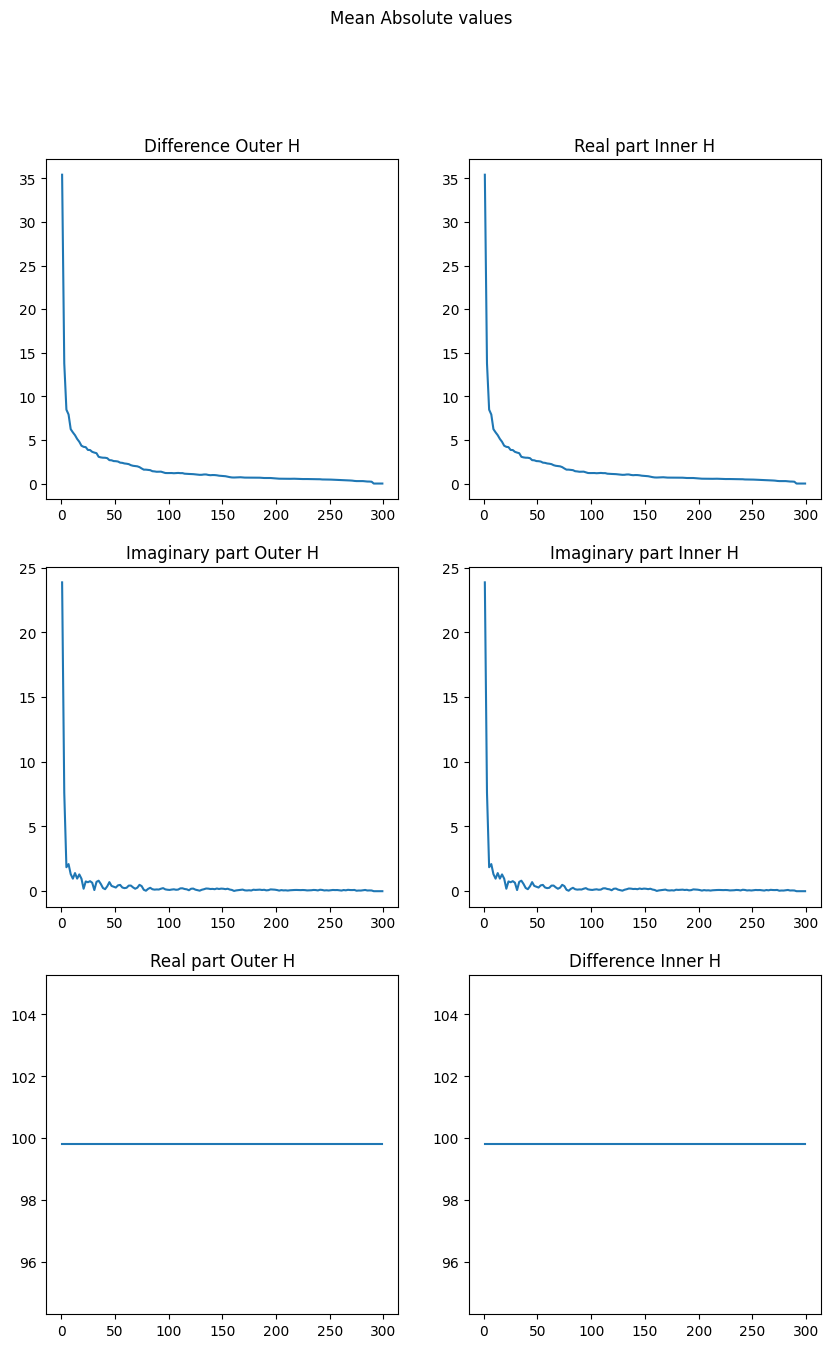

In [214]:
fig,axs = plt.subplots(3,2, figsize=(10,15))

fig.suptitle("Mean Absolute values")

axs[0,0].plot(thresholds, mean_abs_diff_out)
axs[0,0].set_title("Difference Outer H")

axs[2,1].plot(thresholds, mean_abs_diff_in)
axs[2,1].set_title("Difference Inner H")

axs[1,0].plot(thresholds, mean_abs_imag_out)
axs[1,0].set_title("Imaginary part Outer H")

axs[1,1].plot(thresholds, mean_abs_imag_in)
axs[1,1].set_title("Imaginary part Inner H")

axs[2,0].plot(thresholds,mean_abs_real_out)
axs[2,0].set_title("Real part Outer H")

axs[0,1].plot(thresholds,mean_abs_real_in)
axs[0,1].set_title("Real part Inner H")



plt.show()